In [1]:
from picaso import justdoit as jdi 
from picaso import justplotit as jpi

jpi.output_notebook()

Loading BokehJS ...

In [3]:
filename = 'ColdJup-Teq200-sep0.73-mh+050-co100-fsed1-Tstar6000.0-mmw2.2.pkl'
savefilename = '/Volumes/Oy/Reflected-Light-Ames/models/'+filename

cj = pickle.load(open(savefilename.replace('.nc','.pkl'),'rb'))

cj_spectrum = cj[7]
cj_wno, cj_alb, cj_fpfs = cj_spectrum['wavenumber'] , cj_spectrum['albedo'] , cj_spectrum['fpfs_reflected'] 
cj_wno150, cj_fpfs150 = jdi.mean_regrid(cj_wno, cj_fpfs, R=150)
cj_wno50, cj_fpfs50 = jdi.mean_regrid(cj_wno, cj_fpfs, R=50)
cj_wno300, cj_fpfs300 = jdi.mean_regrid(cj_wno, cj_fpfs, R=300)

In [ ]:
filename = 'ColdNep-Teq200-sep0.73-mh+200-co050-fsed1-Tstar6000.0-mmw2.2.pkl'
savefilename = '/Volumes/Oy/Reflected-Light-Ames/models/ColdJup-Teq200-Tint100-sep3-mh-100-co100-Tstar6000.0'+filename

# ds = jdi.xr.load_dataset(savefilename)
# cn = jdi.input_xarray(ds, opacity_ck, calculation='planet')
# cn_spec = cn.spectrum(opacity_ck, calculation='reflected+thermal', full_output=True)
import pickle
cn = pickle.load(open(savefilename.replace('.nc','.pkl'),'rb'))
# pl, noclouds, w_noclouds, f_noclouds, clouds, clouds_added, mols, clouds_spectrum, w_clouds, f_clouds
cn_spectrum = cn[7]
cn_wno, cn_alb, cn_fpfs = cn_spectrum['wavenumber'] , cn_spectrum['albedo'] , cn_spectrum['fpfs_reflected'] 
cn_wno150, cn_fpfs150 = jdi.mean_regrid(cn_wno, cn_fpfs, R=150)
cn_wno50, cn_fpfs50 = jdi.mean_regrid(cn_wno, cn_fpfs, R=50)
cn_wno300, cn_fpfs300 = jdi.mean_regrid(cn_wno, cn_fpfs, R=300)

In [4]:
from myastrotools.tools import SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, NIRC2HFilter, NIRC2JFilter

filters = [SloangFilter(),SloaniFilter(),SloanrFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]

<IPython.core.display.Javascript object>


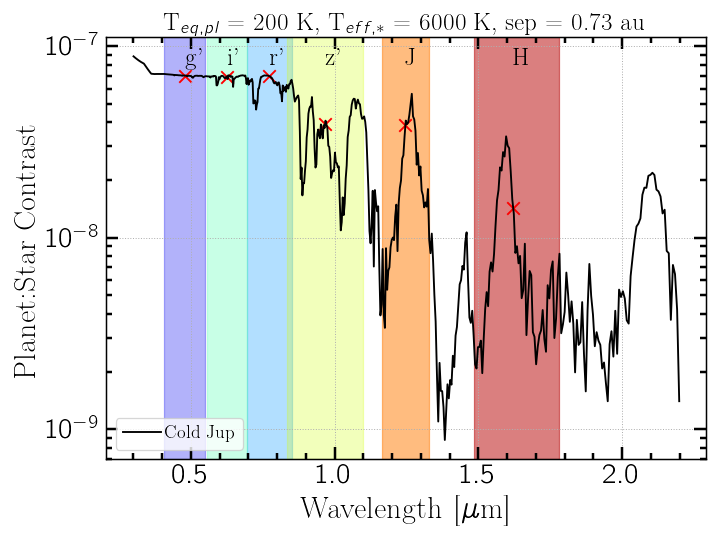

In [7]:
%matplotlib notebook
plt.plot(1e4/cj_wno300, cj_fpfs300, color='black', label='Cold Jup')
#plt.plot(1e4/cn_wno300, cn_fpfs300, color='darkcyan', label='Cold Nep')

import matplotlib
cmap = matplotlib.cm.get_cmap('Paired')
cmap = matplotlib.cm.get_cmap('jet')

from scipy.interpolate import interp1d
interp = interp1d(1e4/cj_wno300, cj_fpfs300)

n = len(filters)
cs = np.linspace(0.1,0.95,n)
colors = cmap(cs)
filterlabely = 8e-8

filter_labels=["g'","r'","i'","z'",'J','H']
for i,f in enumerate(filters[:3]):
    plt.axvspan(f.half_max_low*u.AA.to(u.um), f.half_max_high*u.AA.to(u.um), alpha = 0.3,
               color=colors[i])
    plt.annotate(filter_labels[i], xy = (f.central_wavelength*u.AA.to(u.um),filterlabely), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)
    plt.scatter(f.central_wavelength*u.AA.to(u.um),interp(f.central_wavelength*u.AA.to(u.um)), marker='x', 
                s=100, color='red')
for i,f in enumerate(filters[3:4]):
    plt.axvspan(f.half_max_low*u.nm.to(u.um), f.half_max_high*u.nm.to(u.um), alpha = 0.3,
               color=colors[i+3])
    plt.annotate(filter_labels[i+3], xy = (f.central_wavelength*u.nm.to(u.um),filterlabely), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)
    plt.scatter(f.central_wavelength*u.nm.to(u.um),interp(f.central_wavelength*u.nm.to(u.um)), marker='x', 
                s=100, color='red')
for i,f in enumerate(filters[4:]):
    plt.axvspan(f.half_max_low, f.half_max_high, alpha = 0.5,
               color=colors[i+4])
    plt.annotate(filter_labels[i+4], xy = (f.central_wavelength,filterlabely), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)
    plt.scatter(f.central_wavelength,interp(f.central_wavelength), marker='x', 
                s=100, color='red')

plt.title(r'T$_{eq,pl}$ = 200 K, T$_{eff,*}$ = 6000 K, sep =  0.73 au')
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =10, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =5, width=2,direction='in',labelsize=23)
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=25)
plt.ylabel('Planet:Star Contrast', fontsize=25)
plt.gca().set_yscale('log')
plt.grid(ls=':')
plt.legend(fontsize=15, loc='lower left')
plt.tight_layout()
#plt.savefig('cn-cj-filterbands-plot.png', bbox_inches='tight')

In [12]:
m = 0.12*u.Msun
r = 0.137*u.Rsun
G = c.G
g = (G*m/(r**2)).decompose()
logg = np.log10(g.value)
g,logg

(<Quantity 1753.10423565 m / s2>, 3.2438077390379445)

In [38]:
m = 1.5*u.Msun
r = 10*u.Rsun
G = c.G
g = (G*m/(r**2)).to(u.cm/(u.s**2))
logg = np.log10(g.value)
g,logg

(<Quantity 411.30016749 cm / s2>, 2.6141588863588145)

In [16]:
6*u.Rearth.to(u.Rjup)

0.5352850668606277

In [22]:
from myastrotools.tools import PlanetMass2Radius
PlanetMass2Radius(29)

6.028068830919505

In [23]:
30*u.Mearth.to(u.Mjup)

0.0943905559651843

In [24]:
1.0241e26*u.kg.to(u.Mearth)

17.147876996611142

In [25]:
17*u.Mearth.to(u.Mjup)

0.053487981713604436

In [26]:
24622*u.km.to(u.Rearth)

3.860397297000674

In [28]:
58232*u.km.to(u.Rjup)

0.8145247020645666

In [29]:
5.683e26*u.kg.to(u.Mearth)

95.15807535566948

In [30]:
95*u.Mearth.to(u.Mjup)

0.2989034272230836

In [31]:
1*u.Rjup.to(u.Rearth)

11.20898073093868

In [36]:
10*u.Rearth.to(u.Rjup)

0.8921417781010463

In [34]:
5*u.Mjup.to(u.Mearth)

1589.142032973374

In [40]:
5*5*5*2*21

5250